# 1.5 Supervised Learning Algorithms Part 2-Tree

## Contents:

1. Import Libraries
2. Import Datasets
3. Decission Tree for Scaled Data
4. Confusion Matrix for Scaled Data

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from matplotlib.pyplot import figure

## 2. Import Datasets

In [3]:
# define path to dataset

path = r'/Users/analazarevska/Documents/CAREER FOUNDRY/Data Analytics Program/Machine Learning/A1, Basics of Machine Learning for Analysts/ClimateWins/Data Sets/'

# import dataset

df_scaled = pd.read_csv(os.path.join(path, 'temperature_scaled.csv'))
df_pleasant = pd.read_csv(os.path.join(path, 'pleasant_weather.csv'))

## 3. Decission Tree for Scaled Data

In [5]:
df_scaled.head()

,Unnamed: 0,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,-0.582946,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,-0.257010,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,-0.555784,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,-1.003946,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [7]:
# drop columns that are not in answers dataset

df_scaled_dropped = df_scaled.drop(df_scaled.columns[df_scaled.columns.str.contains('GDANSK|ROMA|TOURS|Unnamed: 0', regex=True)], axis=1)

# keep columns with for mean temperature

df_scaled_dropped = df_scaled_dropped.filter(regex='_temp_mean$', axis=1)

In [9]:
# create an 'X' matrix by dropping the unneeded columns

X = df_scaled_dropped
y = df_pleasant.drop(['DATE'], axis=1)

In [11]:
# check shape of X and y

print(X.shape)
print(y.shape)

(22950, 15)
(22950, 15)


In [13]:
# split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
# print the shapes of the training and testing sets for verification

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 15)
(5738, 15)
(17212, 15)
(5738, 15)


In [17]:
# confusion matrix based on the last "k" in the sequence

locations = list({x.split("_")[0] for x in df_scaled_dropped.columns})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

[Text(0.37908330950953745, 0.9848484848484849, 'x[8] <= 0.376\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.1148501198705067, 0.9545454545454546, 'x[9] <= -0.281\ngini = 0.1\nsamples = 10533\nvalue = [[9904, 629]\n[8963, 1570]\n[9386, 1147]\n[10387, 146]\n[10252, 281]\n[9925, 608]\n[10372, 161]\n[9675, 858]\n[10371, 162]\n[8015, 2518]\n[10179, 354]\n[10307, 226]\n[10533, 0]\n[10323, 210]\n[10376, 157]]'),
 Text(0.0506333828887833, 0.9242424242424242, 'x[2] <= 0.13\ngini = 0.036\nsamples = 7471\nvalue = [[7332.0, 139.0]\n[6811.0, 660.0]\n[7118.0, 353.0]\n[7426.0, 45.0]\n[7390.0, 81.0]\n[7407.0, 64.0]\n[7409.0, 62.0]\n[7243.0, 228.0]\n[7418.0, 53.0]\n[7252.0, 219.0]\n[7318.0, 153.0]\n[7435.0, 36.0]\n[7471.0, 0.0]\n[7438.0, 33.0]\n[7459.0, 12.0]]'),
 Text(0.029220368

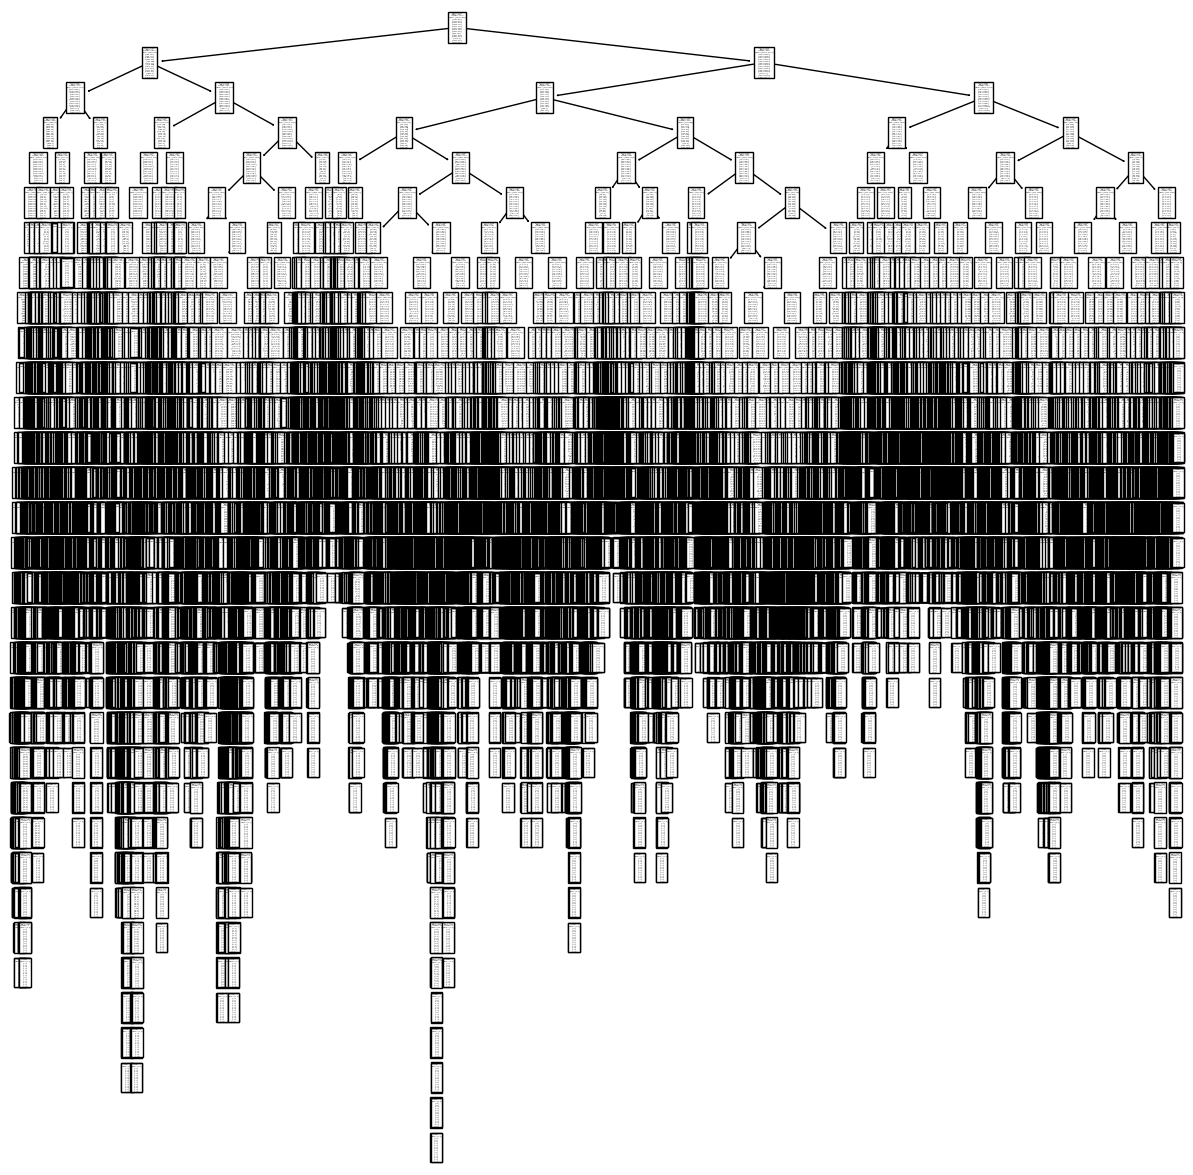

In [19]:
# run decision tree classifier

df_scaled_dropped = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
df_scaled_dropped.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(df_scaled_dropped)

## 4. Confusion Matrix for Scaled Data

In [21]:
# using the cross validation method to find the training accuracy score

y_pred_train = df_scaled_dropped.predict(X_train)
print('Train accuracy score: ',cross_val_score(df_scaled_dropped, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.398442787456748


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


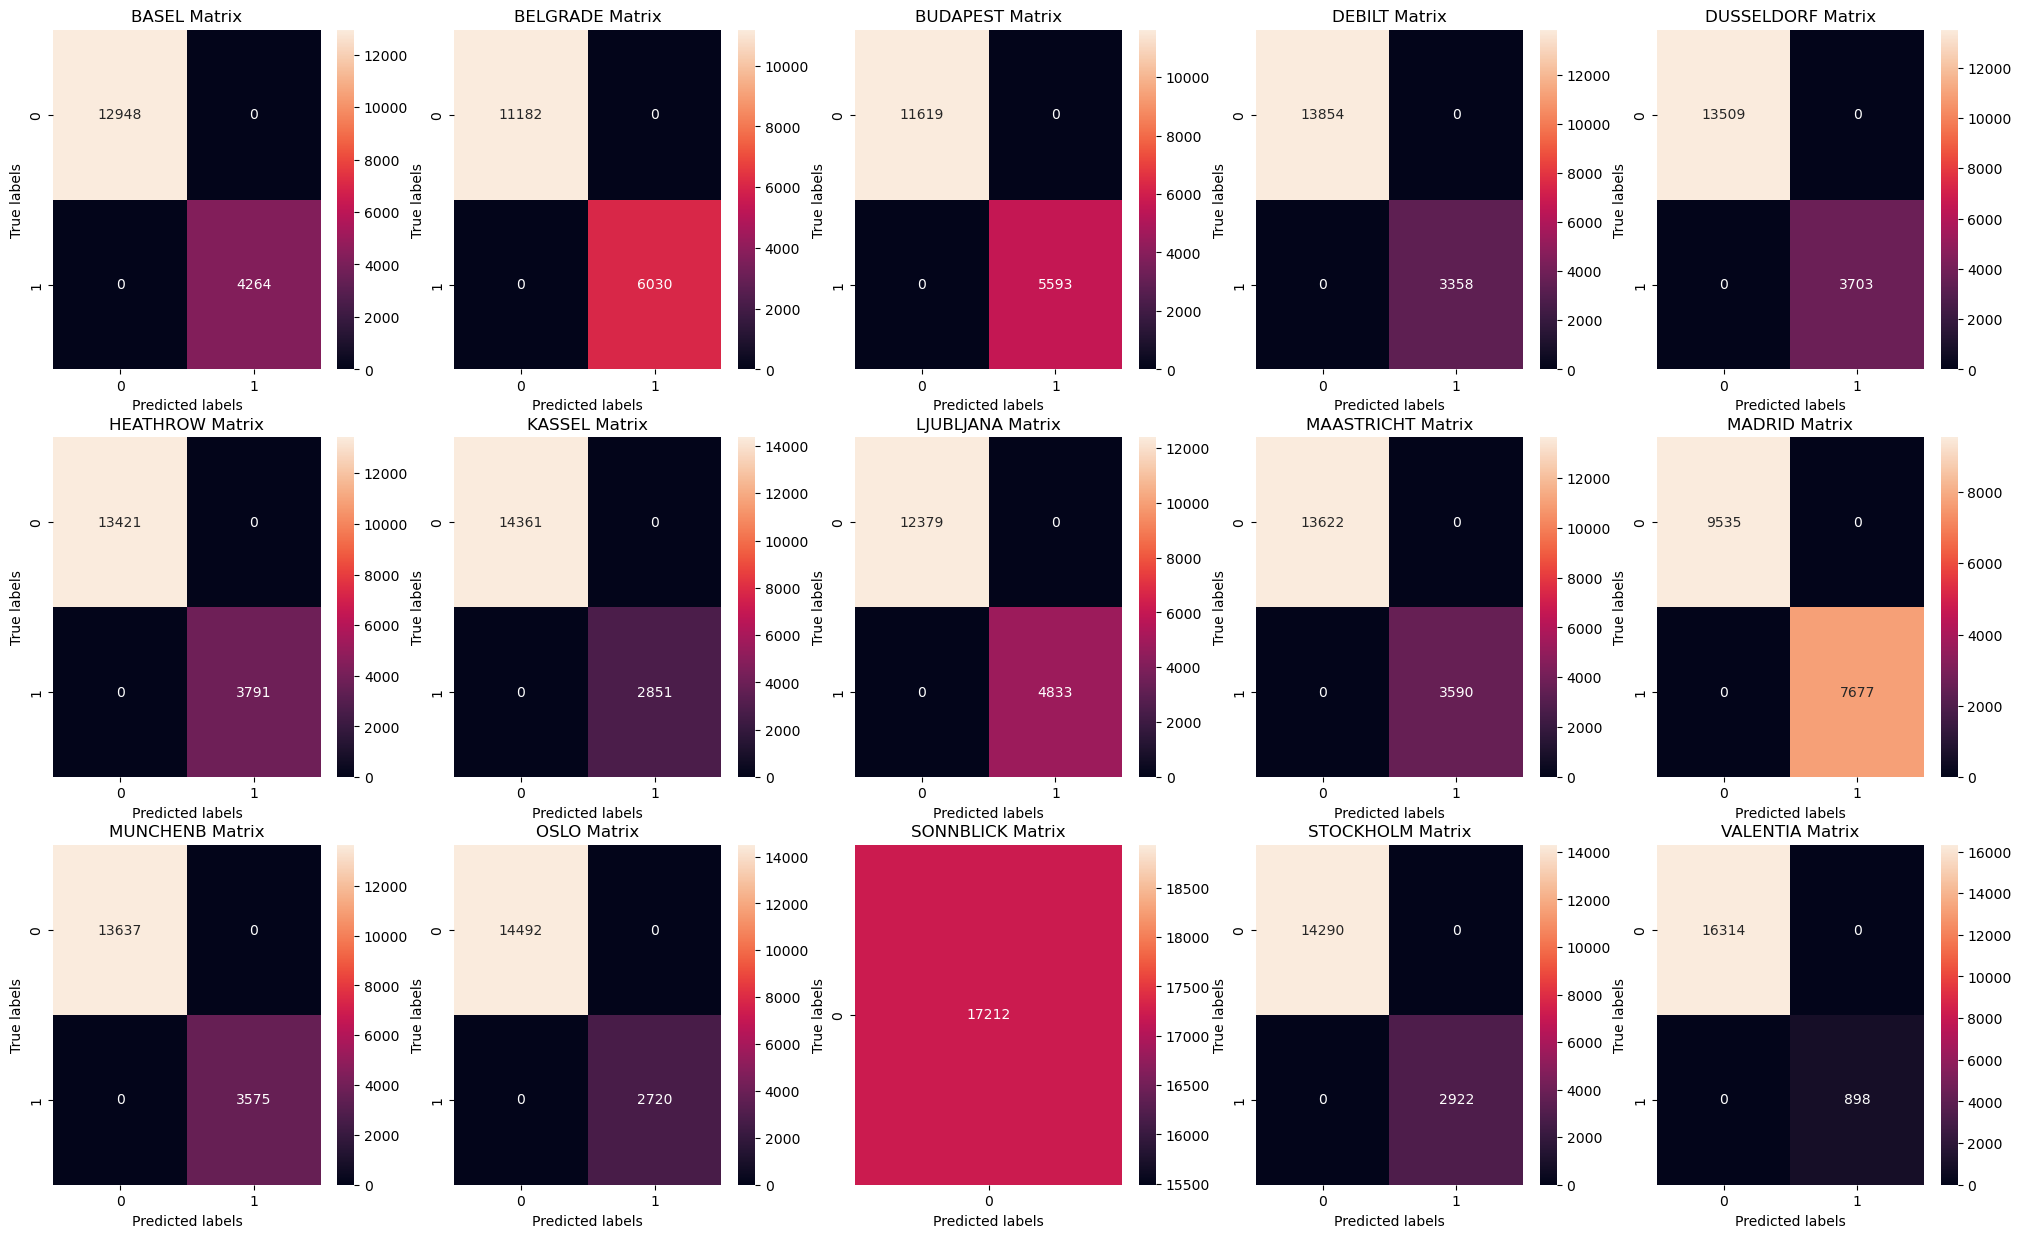

In [23]:
# create a grid of confusion matrices to visualise the classification performance for predicting "pleasant" or "unpleasant" weather at different locations

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data.
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [25]:
# check the testing accuracy score using the cross validation method

y_pred = df_scaled_dropped.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_pred))
multilabel_confusion_matrix(y_test, y_pred)

Test accuracy score:  0.4044963401882189


array([[[3733,  605],
        [ 564,  836]],

       [[3134,  642],
        [ 623, 1339]],

       [[3334,  566],
        [ 572, 1266]],

       [[4169,  468],
        [ 473,  628]],

       [[3967,  540],
        [ 546,  685]],

       [[3938,  632],
        [ 554,  614]],

       [[4424,  391],
        [ 410,  513]],

       [[3562,  633],
        [ 551,  992]],

       [[4051,  511],
        [ 496,  680]],

       [[2677,  491],
        [ 508, 2062]],

       [[4066,  480],
        [ 523,  669]],

       [[4452,  427],
        [ 383,  476]],

       [[5738,    0],
        [   0,    0]],

       [[4371,  395],
        [ 377,  595]],

       [[5263,  199],
        [ 200,   76]]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


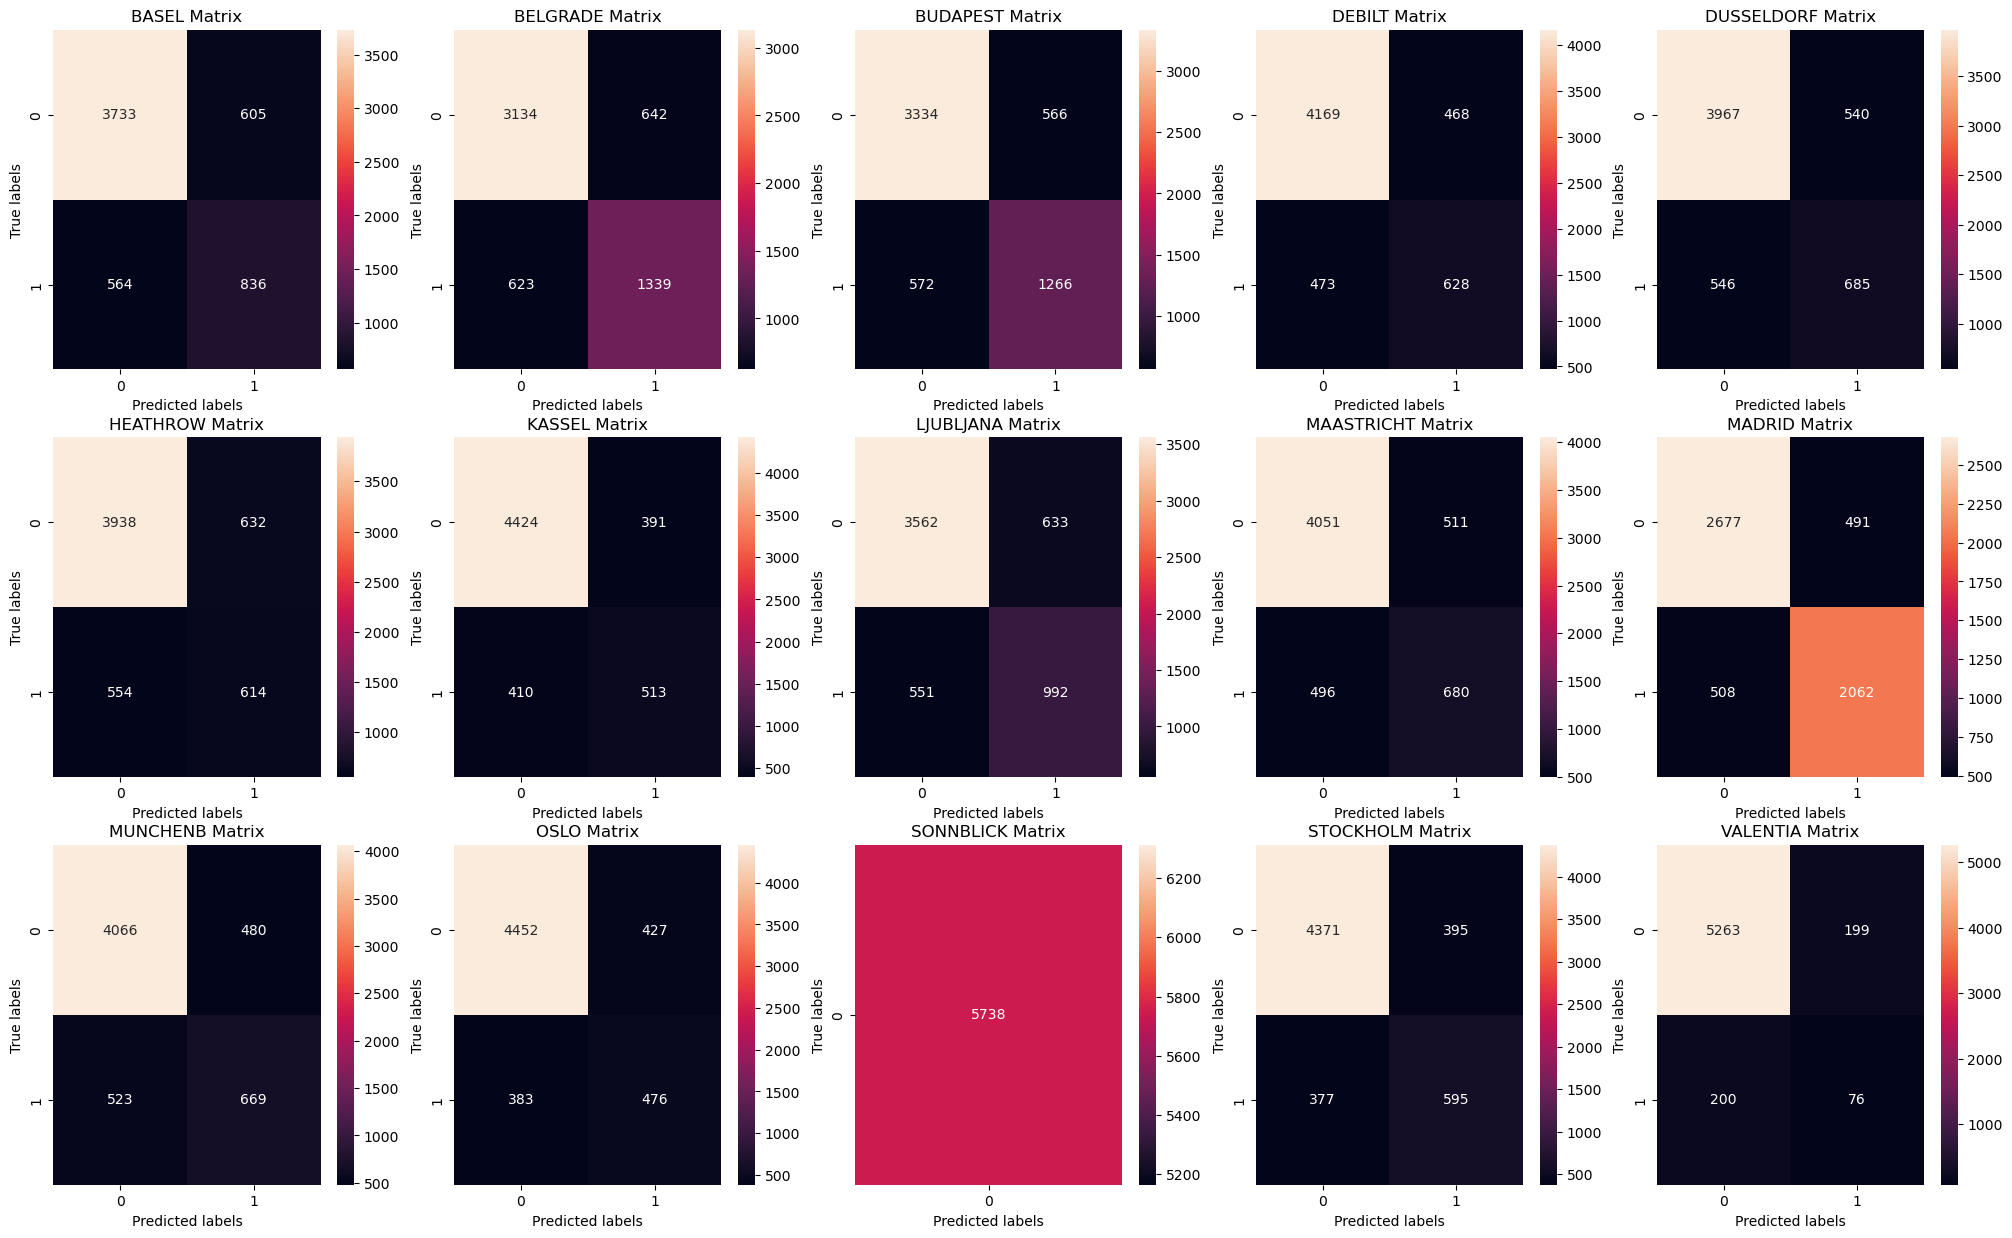

In [27]:
# create a grid of confusion matrices to visualise the classification performance for predicting "pleasant" or "unpleasant" weather at different locations

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data.
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1